In [27]:
%pip install chardet

import pandas as pd 
import numpy as np 
import chardet
import matplotlib.pyplot as plt
import re

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Load dataset 
rawdata = open('../data/FY2023_archived_opportunities.csv', 'rb').read()
result = chardet.detect(rawdata)
encoding = result['encoding']

df = pd.read_csv('../data/FY2023_archived_opportunities.csv', encoding=encoding)
df.head()

In [ ]:
print(df.columns)

Index(['NoticeId', 'Title', 'Sol#', 'Department/Ind.Agency', 'CGAC',
       'Sub-Tier', 'FPDS Code', 'Office', 'AAC Code', 'PostedDate', 'Type',
       'BaseType', 'ArchiveType', 'ArchiveDate', 'SetASideCode', 'SetASide',
       'ResponseDeadLine', 'NaicsCode', 'ClassificationCode',
       'PopStreetAddress', 'PopCity', 'PopState', 'PopZip', 'PopCountry',
       'Active', 'AwardNumber', 'AwardDate', 'Award$', 'Awardee',
       'PrimaryContactTitle', 'PrimaryContactFullname', 'PrimaryContactEmail',
       'PrimaryContactPhone', 'PrimaryContactFax', 'SecondaryContactTitle',
       'SecondaryContactFullname', 'SecondaryContactEmail',
       'SecondaryContactPhone', 'SecondaryContactFax', 'OrganizationType',
       'State', 'City', 'ZipCode', 'CountryCode', 'AdditionalInfoLink', 'Link',
       'Description'],
      dtype='object')


In [ ]:
# Summarize the dataset by state, focusing on the number of contracts and total award amount per state
summary_by_state = df.groupby('State').agg(Contracts=('AwardNumber', 'count'), Total_Award_Amount=('Award$', 'sum'))

print(summary_by_state.head())

summary_by_state['Total_Award_Amount'] = pd.to_numeric(summary_by_state['Total_Award_Amount'], errors='coerce')

# Sort the summary by the Total Award Amount in descending order
summary_sorted = summary_by_state.sort_values(by='Total_Award_Amount', ascending=False)

summary_sorted.head(10)  # Display the top 10 states for a quick view

       Contracts                                 Total_Award_Amount
State                                                              
AA             0                                                  0
AE             9  46800.002410650.001088800.001088801.001087666....
AK            12  5943939.001896246.001000000000.00241195.001088...
AL            11  21384.004959686.4056000.0056000.0013392678.003...
AP            18  20343671.92763836.29383529.7725159181.96251591...


,Contracts,Total_Award_Amount
State,,
NV,3,1.080030e+09
ME,2,2.693400e+04
IA,1,2.074800e+04
AA,0,0.000000e+00
DE,0,0.000000e+00
ND,0,0.000000e+00
Rabat,0,0.000000e+00
AE,9,NaN
AK,12,NaN


In [ ]:
# Summarize the dataset by awardee, focusing on the number of contracts and total award amount per awardee
summary_by_awardee = df.groupby('Awardee').agg(Contracts=('AwardNumber', 'count'), Total_Award_Amount=('Award$', 'sum'))

summary_by_awardee['Total_Award_Amount'] = pd.to_numeric(summary_by_awardee['Total_Award_Amount'], errors='coerce')
# Sort the summary by the Total Award Amount in descending order
summary_sorted_awardee = summary_by_awardee.sort_values(by='Total_Award_Amount', ascending=False)

summary_sorted_awardee.head(10)  # Display the top 10 awardees for a quick view


,Contracts,Total_Award_Amount
Awardee,,
"SARGENT AEROSPACE & DEFENSE LLC, TUCSON, AZ 85743-9453",6,7.087764e+35
"SIKORSKY AIRCRAFT CORP, STRATFORD, CT 06615-9129",6,5.321595e+35
"ADIRONDACK ELECTRONICS INC, ROUND LAKE, NY 12151-1710",5,6.781233e+22
"ARGON ST INC, SMITHFIELD, PA 15478-0905",3,4.139656e+18
"MISSION SYSTEMS DAVENPOST INC, DAVENPORT, IA 52804-1203",3,6.984003e+17
"ROLLS-ROYCE CORPORATION, INDIANAPOLIS, IN 46225-1103",2,3.846926e+14
Northrop Grumman Systems Corporation,2,2.155343e+14
"LOCKHEED MARTIN CORP, ARCHBALD, PA 18403-1527",3,3.458015e+13
Intel Federal LLC 4100 Monument Corner Drive Suite 540 Fairfax VA 22030 USA,2,1.814126e+13


In [ ]:
# Convert the summary to a table format for easy viewing
summary_table_awardee = summary_sorted_awardee.reset_index()

# Prepare the table for display
summary_table_awardee_display = summary_table_awardee[['Awardee', 'Contracts', 'Total_Award_Amount']].head(10)
summary_table_awardee_display.columns = ['Awardee', 'Number of Contracts', 'Total Award Amount ($)']
summary_table_awardee_display


,Awardee,Number of Contracts,Total Award Amount ($)
0,"SARGENT AEROSPACE & DEFENSE LLC, TUCSON, AZ 85...",6,7.087764e+35
1,"SIKORSKY AIRCRAFT CORP, STRATFORD, CT 06615-9129",6,5.321595e+35
2,"ADIRONDACK ELECTRONICS INC, ROUND LAKE, NY 121...",5,6.781233e+22
3,"ARGON ST INC, SMITHFIELD, PA 15478-0905",3,4.139656e+18
4,"MISSION SYSTEMS DAVENPOST INC, DAVENPORT, IA 5...",3,6.984003e+17
5,"ROLLS-ROYCE CORPORATION, INDIANAPOLIS, IN 4622...",2,3.846926e+14
6,Northrop Grumman Systems Corporation,2,2.155343e+14
7,"LOCKHEED MARTIN CORP, ARCHBALD, PA 18403-1527",3,3.458015e+13
8,Intel Federal LLC 4100 Monument Corner Drive S...,2,1.814126e+13
9,"THALES DEFENSE & SECURITY INC, CLARKSBURG, MD ...",2,1.028216e+13


In [ ]:
# Function to remove numeric values and following text from the awardee names
def clean_awardee_name(name):
    return re.split('\d', name, 1)[0].strip()

# Apply the cleaning function to the awardee names
summary_table_awardee['Awardee'] = summary_table_awardee['Awardee'].apply(clean_awardee_name)

# Update the table for display
summary_table_awardee_display_cleaned = summary_table_awardee[['Awardee', 'Contracts', 'Total_Award_Amount']].head(100)
summary_table_awardee_display_cleaned.columns = ['Awardee', 'Number of Contracts', 'Total Award Amount ($)']
summary_table_awardee_display_cleaned


,Awardee,Number of Contracts,Total Award Amount ($)
0,"SARGENT AEROSPACE & DEFENSE LLC, TUCSON, AZ",6,7.087764e+35
1,"SIKORSKY AIRCRAFT CORP, STRATFORD, CT",6,5.321595e+35
2,"ADIRONDACK ELECTRONICS INC, ROUND LAKE, NY",5,6.781233e+22
3,"ARGON ST INC, SMITHFIELD, PA",3,4.139656e+18
4,"MISSION SYSTEMS DAVENPOST INC, DAVENPORT, IA",3,6.984003e+17
...,...,...,...
95,Herc Rentals Inc. FL,1,3.632226e+07
96,NGSS INC ID,1,3.580000e+07
97,PCC Ventures OH,1,3.280421e+07
98,LOCKHEED MARTIN CORPORATION NY,1,3.056148e+07


In [ ]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(summary_table_awardee_display_cleaned):
    # Filter rows based on column: 'Awardee'
    summary_table_awardee_display_cleaned = summary_table_awardee_display_cleaned[(summary_table_awardee_display_cleaned['Awardee'] != "L") | (summary_table_awardee_display_cleaned['Awardee'] != "D")]
    # Filter rows based on column: 'Awardee'
    summary_table_awardee_display_cleaned = summary_table_awardee_display_cleaned[summary_table_awardee_display_cleaned['Awardee'] != "L"]
    return summary_table_awardee_display_cleaned

summary_table_awardee_display_cleaned_clean = clean_data(summary_table_awardee_display_cleaned.copy())
summary_table_awardee_display_cleaned_clean

,Awardee,Number of Contracts,Total Award Amount ($)
0,"SARGENT AEROSPACE & DEFENSE LLC, TUCSON, AZ",6,7.087764e+35
1,"SIKORSKY AIRCRAFT CORP, STRATFORD, CT",6,5.321595e+35
2,"ADIRONDACK ELECTRONICS INC, ROUND LAKE, NY",5,6.781233e+22
3,"ARGON ST INC, SMITHFIELD, PA",3,4.139656e+18
4,"MISSION SYSTEMS DAVENPOST INC, DAVENPORT, IA",3,6.984003e+17


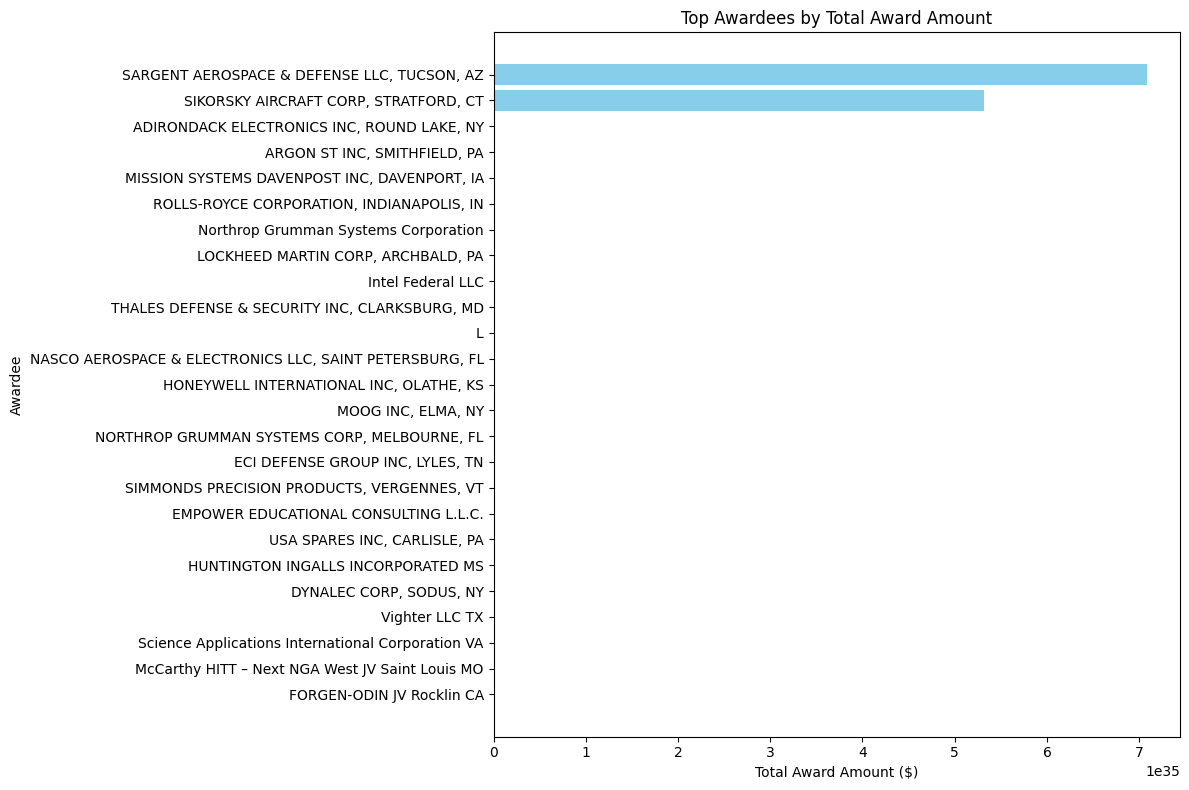

In [ ]:
# Plotting the top 20 awardees by Total Award Amount
top_awardees = summary_table_awardee_display_cleaned_clean.head(25)

plt.figure(figsize=(12, 8))
plt.barh(top_awardees['Awardee'], top_awardees['Total Award Amount ($)'], color='skyblue')
plt.xlabel('Total Award Amount ($)')
plt.ylabel('Awardee')
plt.title('Top Awardees by Total Award Amount')
plt.gca().invert_yaxis()  # Highest values at the top
plt.tight_layout()
plt.show()